# Preprocessing

In [43]:
%pip install pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd

data = pd.read_csv("financial_anomaly_data.csv")

## Handle null values

In [45]:
data.dropna(inplace=True)

data

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


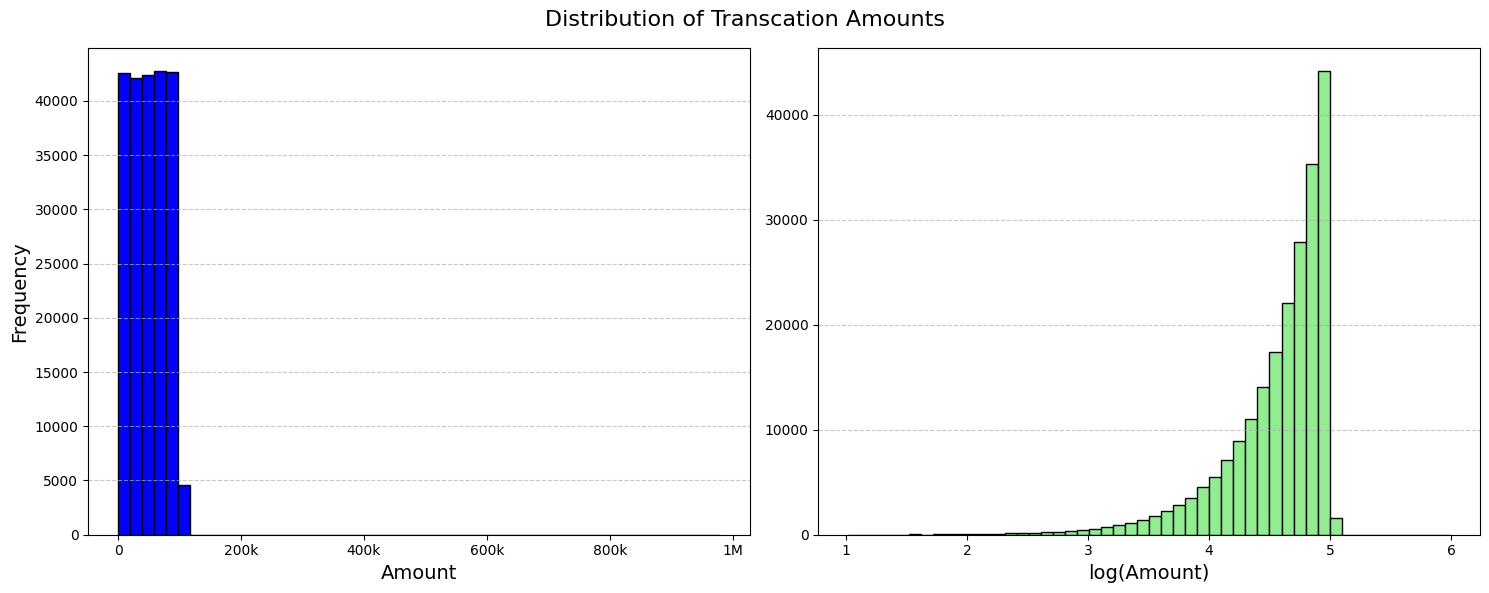

In [46]:
import matplotlib.pyplot as plt
import numpy as np

log_amount = np.log10(data['Amount'])

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].hist(data['Amount'], bins=50, color='blue', edgecolor='black')
ax[0].set_xlabel("Amount", fontsize=14)
ax[0].set_xticks(ticks=[0, 200_000, 400_000, 600_000, 800_000, 1_000_000], 
           labels=['0', '200k', '400k', '600k', '800k', '1M'])
ax[0].set_ylabel("Frequency", fontsize=14)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].hist(log_amount, bins=50, color='lightgreen', edgecolor='black')
ax[1].set_xlabel("log(Amount)", fontsize=14)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
fig.suptitle("Distribution of Transcation Amounts", fontsize=16)
fig.tight_layout()

## Detecting outliers

In [47]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Target'] = ((data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)).astype(int)

data['Target'].value_counts()

Target
0    216949
1        11
Name: count, dtype: int64

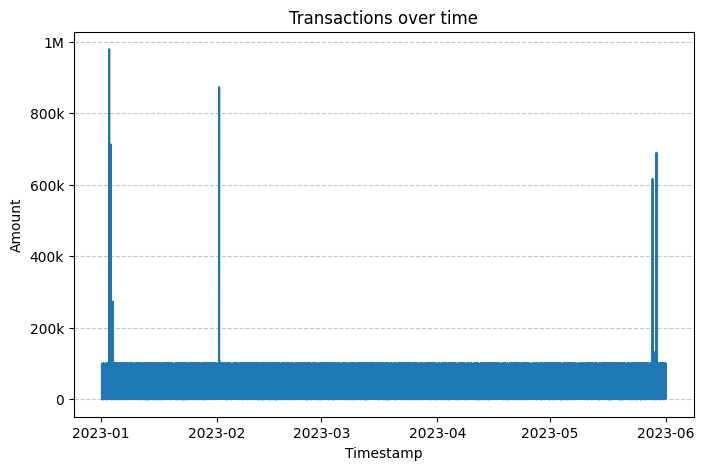

In [48]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
data.set_index('Timestamp', inplace=True)

plt.figure(figsize=(8, 5))
plt.plot(data['Amount'])
plt.xlabel("Timestamp")
plt.ylabel("Amount")
plt.yticks(ticks=[0, 200_000, 400_000, 600_000, 800_000, 1_000_000], 
           labels=['0', '200k', '400k', '600k', '800k', '1M'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Transactions over time")
plt.show()

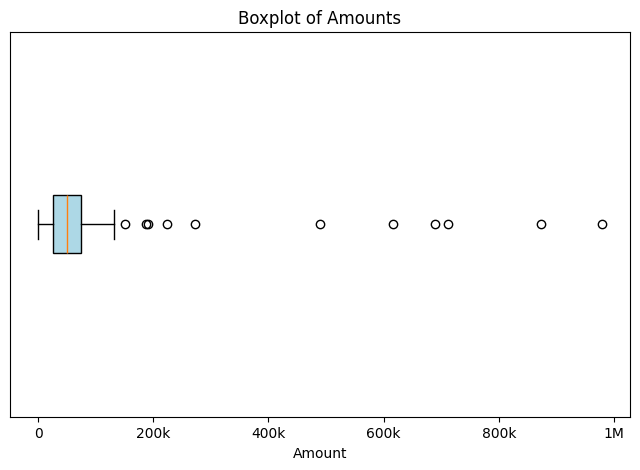

In [49]:
# Create a boxplot for the 'Amount' column
plt.figure(figsize=(8, 5))
plt.boxplot(data['Amount'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Amounts")
plt.xlabel('Amount')
plt.xticks(ticks=[0, 200_000, 400_000, 600_000, 800_000, 1_000_000], 
           labels=['0', '200k', '400k', '600k', '800k', '1M'])
plt.gca().get_yaxis().set_visible(False)
plt.show()

## Standardizing values

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[['Amount']] = scaler.fit_transform(data[['Amount']])

data

,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,Target
Timestamp,,,,,,,
2023-01-01 08:00:00,TXN1127,ACC4,1.545884,MerchantH,Purchase,Tokyo,0
2023-01-01 08:01:00,TXN1639,ACC10,-1.185041,MerchantH,Purchase,London,0
2023-01-01 08:02:00,TXN872,ACC8,0.515582,MerchantE,Withdrawal,London,0
2023-01-01 08:03:00,TXN1438,ACC6,-1.718415,MerchantE,Purchase,London,0
2023-01-01 08:04:00,TXN1338,ACC6,-1.696809,MerchantI,Purchase,Los Angeles,0
...,...,...,...,...,...,...,...
2023-05-31 23:55:00,TXN1286,ACC6,0.427759,MerchantA,Withdrawal,San Francisco,0
2023-05-31 23:56:00,TXN1015,ACC5,0.637149,MerchantG,Transfer,London,0
2023-05-31 23:57:00,TXN1979,ACC15,-1.439504,MerchantF,Purchase,London,0


## Handle Categorical Variables

In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_merchant = LabelEncoder()
le_transaction_type = LabelEncoder()
le_location = LabelEncoder()

# Apply label encoding
data['Merchant'] = le_merchant.fit_transform(data['Merchant'])
data['TransactionType'] = le_transaction_type.fit_transform(data['TransactionType'])
data['Location'] = le_location.fit_transform(data['Location'])

data

,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,Target
Timestamp,,,,,,,
2023-01-01 08:00:00,TXN1127,ACC4,1.545884,7,0,4,0
2023-01-01 08:01:00,TXN1639,ACC10,-1.185041,7,0,0,0
2023-01-01 08:02:00,TXN872,ACC8,0.515582,4,2,0,0
2023-01-01 08:03:00,TXN1438,ACC6,-1.718415,4,0,0,0
2023-01-01 08:04:00,TXN1338,ACC6,-1.696809,8,0,1,0
...,...,...,...,...,...,...,...
2023-05-31 23:55:00,TXN1286,ACC6,0.427759,0,2,3,0
2023-05-31 23:56:00,TXN1015,ACC5,0.637149,6,1,0,0
2023-05-31 23:57:00,TXN1979,ACC15,-1.439504,5,0,0,0


In [52]:
# Extract features
data['Hour'] = data.index.hour
data['DayOfWeek'] = data.index.weekday
data['Month'] = data.index.month
data['DayOfMonth'] = data.index.day

data.drop(['TransactionID', 'AccountID'], axis=1, inplace=True)

data

,Amount,Merchant,TransactionType,Location,Target,Hour,DayOfWeek,Month,DayOfMonth
Timestamp,,,,,,,,,
2023-01-01 08:00:00,1.545884,7,0,4,0,8,6,1,1
2023-01-01 08:01:00,-1.185041,7,0,0,0,8,6,1,1
2023-01-01 08:02:00,0.515582,4,2,0,0,8,6,1,1
2023-01-01 08:03:00,-1.718415,4,0,0,0,8,6,1,1
2023-01-01 08:04:00,-1.696809,8,0,1,0,8,6,1,1
...,...,...,...,...,...,...,...,...,...
2023-05-31 23:55:00,0.427759,0,2,3,0,23,2,5,31
2023-05-31 23:56:00,0.637149,6,1,0,0,23,2,5,31
2023-05-31 23:57:00,-1.439504,5,0,0,0,23,2,5,31


In [53]:
data.to_csv("preprocessed_data.csv")